In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dir_data = './data/samples/Part01/'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/samples/Part01/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
#1
cut_rule = [0,1,2.5,3,5,app_train['CNT_CHILDREN'].max()]
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, right = False, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()


[0.0, 1.0)     215371
[1.0, 2.5)      87868
[3.0, 5.0)       4146
[5.0, 19.0)       124
[2.5, 3.0)          0
Name: CNT_CHILDREN_GROUP, dtype: int64

In [68]:
#2-1 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL
grp = ['CNT_CHILDREN_GROUP','TARGET']
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
[0.0, 1.0)          0         166747.010980
                    1         160804.210548
[1.0, 2.5)          0         174590.584401
                    1         176115.362720
[3.0, 5.0)          0         175057.123091
                    1         159848.673123
[5.0, 19.0)         0         165127.500000
                    1         192937.500000
Name: AMT_INCOME_TOTAL, dtype: float64

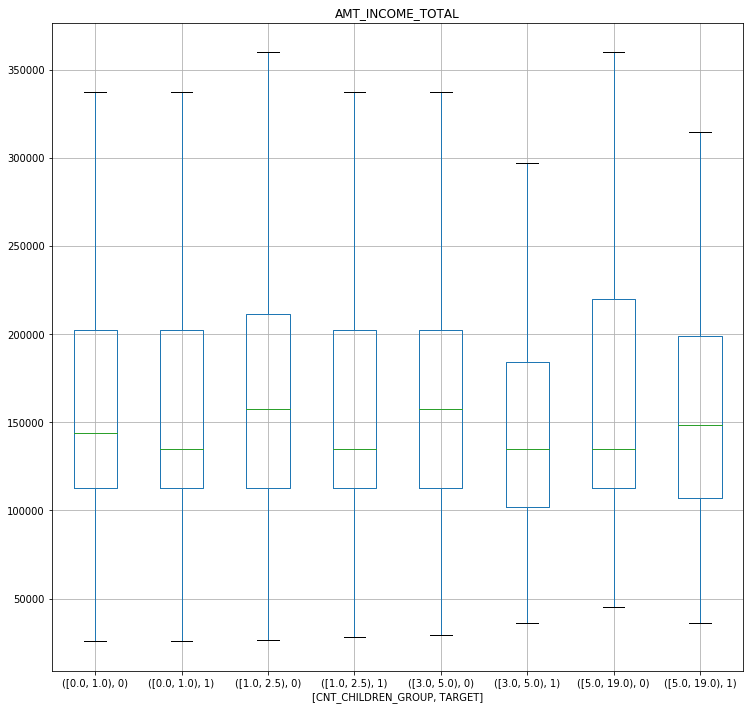

In [71]:
#2-2 並繪製 baxplot
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [72]:
#3
#z_score =(x-np.mean(x))/np.std(x)
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: x-np.mean(x)/np.std(x))
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,202498.104340
1,270000.0,269998.429576
2,67500.0,67498.429576
3,135000.0,134998.429576
4,121500.0,121498.429576
